# 1. 선형회귀

(1) 화면 출력 확인

In [ ]:
!pip install numpy
!pip install matplotlib

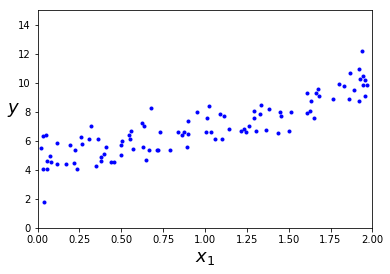

In [ ]:
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# rand(m, n) : 0~1의 균일분포 표준정규분포 난수를 matrix array(m,n) 생성
# randn(m, n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수 matrix array(m,n) 생성
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation=0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

(2) theta_best 출력 확인

In [ ]:
# 정규방정식을 사용한 선형회귀 접근

#np.ones((m, n)) : 1로 채운 행렬 생성
#np.c_[a, b] : 두 개의 1차원 배열을 칼럼으로 붙여서 2차원 배열 생성
x_b = np.c_[np.ones((100, 1)), x]

#np.linalg.inv() : 역행렬 구하기
#inv 역행렬을 구하고 .dot을 사용해 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

print(theta_best) # y절편 / 가중치

[[4.36315487]
 [2.66108908]]


(3)y_predict 출력확인

In [ ]:
x_new = np.array([[0], [2]])
# 두 개의 배열 세로로 합쳐서 2차원 배열 생성
x_new_b = np.c_[np.ones((2, 1)), x_new]
# 내적
y_predict = x_new_b.dot(theta_best)
print(y_predict)

[[4.36315487]
 [9.68533304]]


(4) 화면 출력 확인

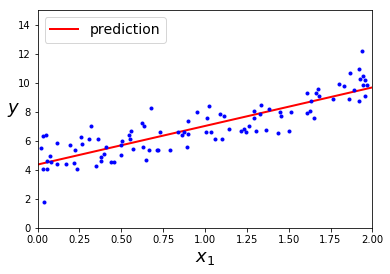

In [ ]:
#모델 예측 그래프로

plt.plot(x_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

(5) lin_reg.intercept_, lin_reg.coef_ 출력 확인

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형회귀
lin_reg = LinearRegression()
# 모형 추정. 상수항 결합
lin_reg.fit(x, y)

# intercept_ : y절편 (추정된 상수항)
# coef_ : 기울기(추정된 가중치 벡터)
print(lin_reg.intercept_, lin_reg.coef_)

[4.36315487] [[2.66108908]]


(6) lin_reg.predict(x_new) 출력 확인

In [ ]:
# 새로운 입력 데이터에 대한 출력 데이터 예측
print(lin_reg.predict(x_new))

[[4.36315487]
 [9.68533304]]


(7) theta_best_svd 출력확인

In [ ]:
#lstsq return : 최소 자승 문제, 잔차제곱합, 랭크, 특이값
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

print(theta_best_svd) 

[[4.36315487]
 [2.66108908]]


(8) np.linalg.pinv(x_b).dot(y) 출력확인

In [ ]:
# pinv() : 유사역행렬
print(np.linalg.pinv(x_b).dot(y))

[[4.36315487]
 [2.66108908]]


(9) theta 출력확인

In [ ]:
# 경사하강법을 사용한 선형회귀 접근법

# learning rate
eta = 0.1
# 반복횟수
n_iterations = 1000
# 데이터셋
m = 100
# 최적의 해
theta = np.random.randn(2, 1)

# gradients : 경사, 기울기 
for iteration in range(n_iterations):
    # 손실 함수의 미분값
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    # -gradients의 방향으로 eta만큼 이동하며 최적의 해를 찾음
    theta = theta - eta * gradients

print(theta)

[[4.36315487]
 [2.66108908]]


(10) x_new_b.dot(theta) 출력확인

In [ ]:
# theta의 값과 위의 기울기와의 값이 같은 것을 볼 수 있다. ?
print(x_new_b.dot(theta))

[[4.36315487]
 [9.68533304]]


(11) 화면 출력 확인

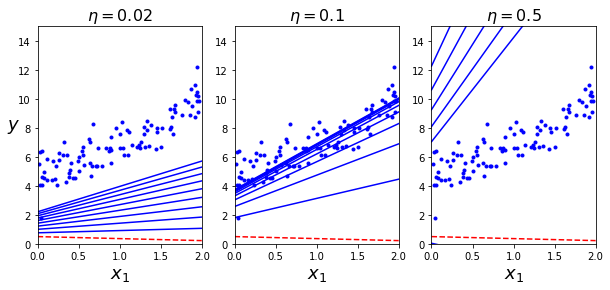

In [ ]:
# 학습률이 0.02, 0.1, 0.5일 때의 결과를 보여줌

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    #샘플 수
    m=len(x_b)
    plt.plot(x, y, "b.")
    #반복횟수
    n_iterations = 1000

    for iteration in range(n_iterations):
        #그래프 그리기
        if iteration < 10:
            y_predict = x_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()

(12) 화면 출력 확인

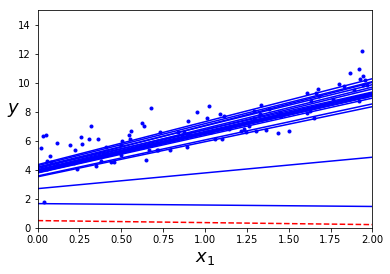

In [ ]:
# 스토캐스틱(확률적) 경사 하강법을 사용한 선형회귀 접근
# 한개씩 무작위로 샘플링하여 학습하는 방법

# 다른 경사 하강법이랑 비교하려고 theta값을 저장할 배열
theta_path_sgd = []

m = len(x_b)
np.random.seed(42)
n_epochs = 50

# 학습 스케쥴 하이퍼파라매터
t0, t1 = 5, 50

# 학습률을 감소시키는 학습 스케쥴 함수
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

# epoch : 학습단위
for epoch in range(n_epochs):
    for i in range(m):
        #그래프 그리기
        if epoch == 0 and i < 20:
            y_predict = x_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        random_index = np.random.randint(m)
        # 훈련세트와 실제값에서 랜덤하게 가져옴
        xi = x_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]

        # i번째 샘플에 대한 gradients를 계산
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # 학습률 계속해서 감소시킴
        eta = learning_schedule(epoch * m + i)
        # 구한 학습률 만큼 이동
        theta = theta - eta * gradients
        # 구한 최적의 해를 추가
        theta_path_sgd.append(theta)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

(13) theta 출력확인

In [ ]:
print(theta)

[[4.36565053]
 [2.65639997]]


(14) sgd_reg.fit(x, y.ravel()) 출력확인

In [ ]:
from sklearn.linear_model import SGDRegressor

# SGD == 스토캐스틱 경사하강법
# max_iter : epoch, penalty : 정규화식, eta0 : 학습률 초기 값
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
print(sgd_reg.fit(x, y.ravel()))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


(15) sgd_reg.intercept_, sgd_reg.coef_) 출력확인

In [ ]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.35767241] [2.67092457]


(16) theta 출력확인

In [ ]:
# 미니배치 경사 하강법을 사용한 선형회귀 접근

theta_path_mgd = []
# 반복 횟수
n_iterations = 50

# 사용할 미니배치 크기 (1이면 스토캐스틱이랑 동일)
minibatch_size = 20
np.random.seed(42)
tehta = np.random.randn(2, 1)
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)
  
t = 0

theta = np.random.randn(2,1)
for epoch in range(n_iterations):
    # 순서를 무작위로
    # 매 epoch마다 섞어서 훈련세트를 고르게 사용할 수 있도록
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        #t가 늘어나면서 학습률이 점점 작아짐
        t += 1
        # minibatch_size만큼 샘플을 가져와서 gradient 계산
        xi = x_b_shuffled[i : i+minibatch_size]
        yi = y_shuffled[i : i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta)

[[4.33688454]
 [2.64321762]]


(17) 화면 출력 확인

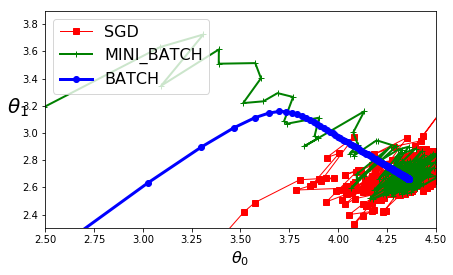

In [ ]:
# 3개의 경사하강법을 실행하면서 저장한 theta값으로 그래프 그리기
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# 배치 경사 하강법은 바로 최솟값으로
# 스토캐스틱과 미니배치는 최솟값 부근에서 움직임
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=16)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 다차항회귀

In [ ]:
import numpy as np
import numpy.random as rnd

(1) 화면 출력 확인

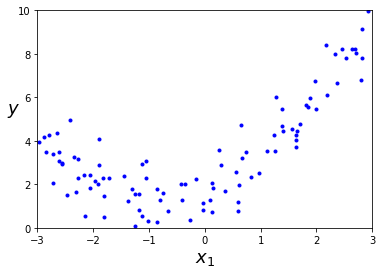

In [ ]:
np.random.seed(42)
# 랜덤 개수 설정
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

(2) X[0] 출력 확인

In [ ]:
# PolynomialFeatures == 다차항회귀
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환
# degree : 차수, include_bias : 상수항 생성 여부
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])

[-0.75275929]


(3) X_poly[0] 출력 확인

In [ ]:
print(x_poly[0])

[-0.75275929  0.56664654]


(4) lin_reg.intercept_, lin_reg.coef_ 출력 확인

In [ ]:
# LinearRegression : 선형 회귀분석
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

# intercept_ : y절편 (추정된 상수항)
# coef_ : 기울기(추정된 가중치 벡터)
print("lin_reg.intercept_ : ", lin_reg.intercept_)
print("lin_reg.coef_ : ", lin_reg.coef_)

# 우리가 설정한 0.5 * x**2 + x + 2와 많이 유사.. ?

lin_reg.intercept_ :  [1.78134581]
lin_reg.coef_ :  [[0.93366893 0.56456263]]


(5)화면 출력 확인

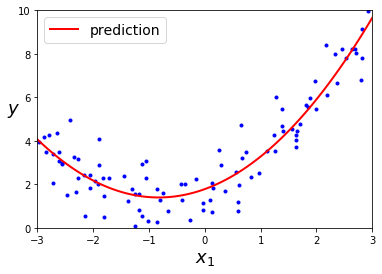

In [ ]:
# linspace(start, end, num-points) : 시작점과 끝점을 균일 간격으로 나눈 점들 생성
# reshape(m, n) : (m, n) 배열로 변형
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)

plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

(6)화면 출력 확인

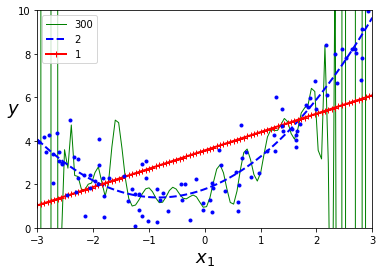

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 차수를 300, 2, 1로 해 그래프 그리기
for style, width, degree in (("g-", 1, 300),
                             ("b--", 2, 2),
                             ("r-+", 2, 1)):
    # 특성 추가. 300차, 2차, 1차
    polybig_features = PolynomialFeatures(degree=degree,
                                          include_bias=False)
    #표준화 인스턴스 생성
    std_scaler = StandardScaler()
    # 추정기로 선형 회귀 사용
    lin_reg = LinearRegression()
    # 2개의 변환기와 1개의 추정기로 구성된 파이프라인 생성
    # 파이프라인 : list타입으로 전달된 첫번째 파라미터의 요소들을 순차적으로 실행
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, style, label=str(degree), linewidth=width)
    # 300은 오버피팅, 1은 언더피팅

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 규제

화면 출력 확인 및 결과 해석

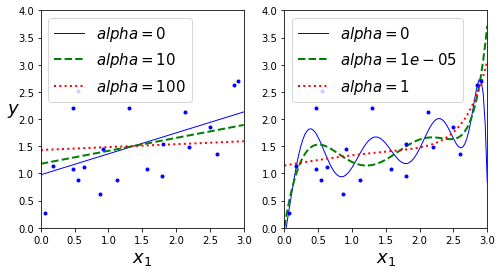

In [ ]:
# 규제 : 과대 적합이 되지 않도록 모델을 강제로 제한함
# 릿지 회귀에 사용하는 규제 방식을 L2 규제라 함

from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
# rand(m, n) : 0~1의 균일분포 표준정규분포 난수를 matrix array(m,n) 생성
# randn(m, n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수 matrix array(m,n) 생성
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5

# linspace(start, end, num-points) : 시작점과 끝점을 균일 간격으로 나눈 점들 생성
# reshape(m, n) : (m, n) 배열로 변형
x_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    #zip(*iterable) : 동일한 개수로 이루어진 자료형을 묶어주는 함수
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # 알파가 0이면 선형회귀
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        #다항회귀일 경우
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        
        model.fit(x, y)
        y_new_regul = model.predict(x_new)
        #알파가 0이 아니면 lw=2
        lw = 2 if alpha > 0 else 1
        plt.plot(x_new, y_new_regul, style,
                 linewidth=lw, label=r"$alpha={}$".format(alpha))
        
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8, 4))

plt.subplot(121)
#릿지회귀를 하되 다항회귀는 false, 알파값 지정(0, 10, 100)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

#왼쪽 그래프 : 평범한 릿지 모델을 사용해 선형예측 생성
#오른쪽 그래프 : PolynomialFeatures(degree=10)를 사용해 데이터를 확장 후 규제를 주어 그래프를 변화시킴
#  == 릿지 규제를 사용한 다항 회귀

#알파를 증가시킬수록(가중치에 대한 규제가 커질수록) 직선에 가까워짐
#  == 모델의 분산은 줄어들지만 편향은 커지게됨


# 활성함수

화면 출력 확인 및 각 활성함수의 특징을 비교 서술

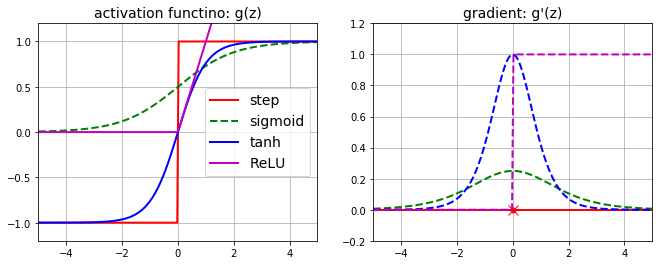

In [ ]:
from __future__ import division, print_function, unicode_literals
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#로지스틱 시그모이드
def logit(z):
    return 1 / (1 + np.exp(-z))

#렐루함수
def relu(z):
    return np.maximum(0, z)

#미분
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

#[-5, 5] 구간 내에 균일한 간격의 점 200개로 구성된 벡터 생성
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

#미분전 활성화함수
plt.subplot(121)

#discrete, step
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step") 
#시그모이드 [0 ~ 1]
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid") 
#양극시그모이드 [-1 ~ 1] (tanh == Hyperbolic Tangent)
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh") 
#렐루 max(0, x)
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU") 

plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation functino: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])


#미분후
plt.subplot(122)
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)

plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step")
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, derivative(np.tanh, z), "b--", linewidth=2, label="tanh")
plt.plot(z, derivative(relu, z), "m--", linewidth=2, label="ReLU")

plt.grid(True)
plt.title("gradient: g'(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#step, 계단함수는 임계치를 경계로 출력이 바뀜. 0 또는 1 (binary)
#최적화를 위해 미분을 해야하지만 미분이 되지않아 사용불가

#시그모이드는 Gradient Vanishing 현상이 발생함. 
#일정 이상 올라가면 미분값이 거의 0에 수렴하게 됨 == 미분값이 소실될 가능성이 크다
#함숫값 중심이 0이 아님 -> 학습이 느려질 수 있다

#tanh(하이퍼볼릭탄젠트)도 gradient vanishing 문제가 존재함
# 시그모이드를 transformation해서 얻을 수 있음 -> 중심값을 0으로 옮겨 해결함

#ReLu는 x > 0면 기울기가 1인 직선이고 x < 0이면 함숫값이 0이 됨
# -> gradient vanishing 문제를 해결함


# 오류 역전파

(1) 해당 연산망의 그래프 연산을 손으로 작성

In [ ]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y 
b = a + z
c = np.sum(b)

(2) 위의 연산을 통한 grad_c, grad_b, grad_a, grad_z, grad_x, grad_y 출력 확인

In [ ]:
grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

print("grad_c : ", grad_c)
print("grad_b : ", grad_b)
print("grad_a : ", grad_a)
print("grad_z : ", grad_z)
print("grad_x : ", grad_x)
print("grad_y : ", grad_y)

grad_c :  1.0
grad_b :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_a :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_z :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_x :  [[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
grad_y :  [[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


(3) 역전파 함수 backward()를 이용한 x의 미분, y의 미분 출력 확인

In [ ]:
import torch

x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D, requires_grad=True)
z = torch.randn(N, D)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
print("x.grad : \n", x.grad)
print("y.grad : \n", y.grad)

x.grad : 
 tensor([[-0.1652, -0.1749,  1.0442,  0.1687],
        [-1.2793,  0.2426,  0.2795,  1.3053],
        [ 3.3740, -2.3465, -0.8554,  0.3767]])
y.grad : 
 tensor([[ 1.6590, -0.5922,  0.6785, -0.1997],
        [ 1.0224,  2.4894, -1.1024, -0.7629],
        [ 0.1443, -0.8616, -0.5288, -1.7387]])


(4) (2)와 (3)의 방법의 차이를 설명

: (2)는 오류 역전파를 직접 구한 것이고
  (3)은 pytorch의 backward()를 사용해서 구함.

# 신경망 학습

매 t마다 y_pred에 따른 loss 변화를 화면 출력 확인 (plot)하고, 결과 해석

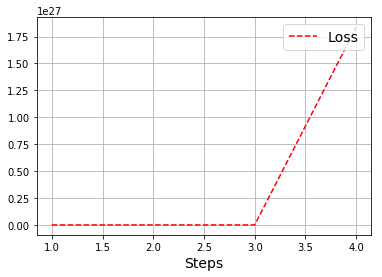

In [ ]:
import torch

# N : 배치크기, D_in : 입력차원
# H : 은닉 계층 차원, D_out : 출력 차원
N, D_in, H, D_out = 64, 1000, 100, 10

# torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
#무작위 입력과 출력 데이터 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
#무작위 가중치
#requires_grad=True면 계산은 추적됨 (변수에 대한 그래디언트는 .grad 속성에 누적됨)
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

#학습률
learning_rate = 10e-6

diff_loss = list()
axis_t = [i for i in range(1, 501)]

for t in range(500):
    #y값 예측
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    #손실 계산
    loss = (y_pred - y).pow(2).sum()
    
    #역전파 계산 (requires_grad=True인 변수 gradient 구함)
    loss.backward()
    
    #손실함수 변화 기록
    diff_loss.append(loss)
    
    #기록 추적(메모리 사용) 방지를 위해 사용함
    with torch.no_grad():
        #경사하강법을 사용해 가중치 갱신
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        #가중치 갱신 후 변화도 0으로 만듦
        w1.grad.zero_()
        w2.grad.zero_()
        
plt.plot(axis_t, diff_loss, "r--", label="Loss")
plt.grid(True)
plt.xlabel("Steps", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.show()

#학습률이 너무 커 최솟값을 지나쳐가서 loss값이 수렴하지 못함
